<a href="https://colab.research.google.com/github/SrMouraSilva/Aprendizagem-probabilistica/blob/main/Trabalho_1_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Por favor**, veja esse arquivo online em: 
https://colab.research.google.com/drive/1zppXQ2Z2vd0aVXo9Lv2Mj8oRPrn9UidF?usp=sharing

In [ ]:
# Programação simbólica
import sympy as sp
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nas células
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

Universidade Federal do Ceará
* **Disciplina**: TÓPICOS AVANÇADOS EM APRENDIZAGEM DE MÁQUINA / TÓPICOS ESPECIAIS EM LÓGICA II
* **Código**: CK0255/CKP8377
* **Professores**: João Paulo P. Gomes / César Lincoln C. Mattos
* **Semestre**: 2020.2
* **Discente**: Paulo Mateus M. da Silva
* **Matrícula**: 486351
* **Curso**: Ciência da Computação

# Trabalho 1

> **Leia as instruções:**
> 
> * O trabalho é individual.
> * As simulações poderão ser realizadas em quaiquer linguagens de programação.
> * Para a avaliação do trabalho deverá ser submetido um arquivo pdf com texto e figuras referentes aos
resultados das simulações.
> * Para a avaliação do trabalho deverão ser enviados os códigos fonte.


## Item 1. Implemente um modelo de regressão linear Bayesiana para os dados disponı́veis em `linear_regression_data.csv`

* Apresente um gráfico contendo os dados e uma representação da distribuição preditiva encontrada.
* Esta representação consistirá na curva da média e nas curvas da média mais 2 desvios padrões e média menos 2 desvios padrões.




### Arquivo `linear_regression_data.csv`

**Obs**: Adicionei uma linha cabeçalho

In [ ]:
import csv
from io import StringIO

linear_regression_data = """x,y
3.929383711957232794e-01,8.635962440369174264e-02
-4.277213300992410705e-01,-6.438717253893857517e-01
-5.462970928715937813e-01,-6.749814691791049537e-01
1.026295381657824635e-01,-2.628915762576424231e-01
4.389379395711261456e-01,1.431774137042062522e-01
-1.537870797510780818e-01,-4.727288393782366760e-01
9.615283967692309641e-01,1.141669044377056769e-01
3.696594771697265802e-01,-1.803229527579142955e-01
-3.813619703127812954e-02,1.182141389317931113e-02
-2.157649636116989456e-01,-7.986456845978145980e-02
"""

dataset_1 = pd.read_csv(StringIO(linear_regression_data))
dataset_1

,x,y
0,0.392938,0.086360
1,-0.427721,-0.643872
2,-0.546297,-0.674981
3,0.102630,-0.262892
4,0.438938,0.143177
5,-0.153787,-0.472729
6,0.961528,0.114167
7,0.369659,-0.180323
8,-0.038136,0.011821
9,-0.215765,-0.079865


### Gráfico dos pontos de `linear_regression_data.csv`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


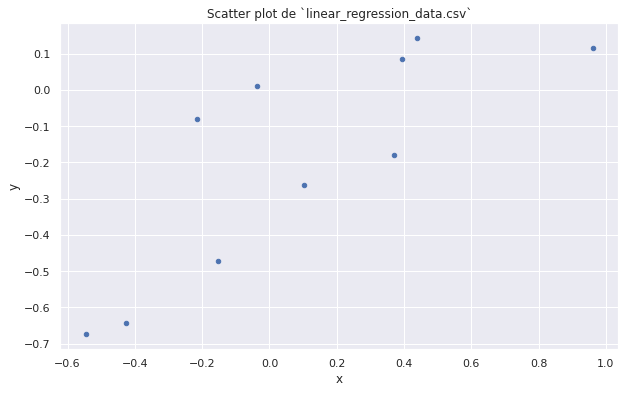

In [ ]:
dataset_1.plot.scatter(x='x', y='y', title="Scatter plot de `linear_regression_data.csv`")

### Implementação do modelo

#### Caso geral

> `RLB` = Regressão Linear Bayesiana.
> 
> * @param $D$: Quantidade de atributos (incluindo a constante $1$)
> * @param $\boldsymbol{m}_0$: Médias da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
> * @param $\boldsymbol{S}_0$: Matriz de covariância da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
> * @param $σ$: Desvio padrão do ruído: $p(\epsilon) = \mathcal{N}(\epsilon|0, σ^2)$
> 
> Observe que é o parâmetro é o desvio padrão, **não** a variância.

In [ ]:
class RLB:
    def __init__(self, D, m_0, S_0, σ=1):
        """
        `RLB` = Regressão Linear Bayesiana.

        @param $D$: Quantidade de atributos (incluindo a constante $1$)
        @param $\boldsymbol{m}_0$: Médias da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
        @param $\boldsymbol{S}_0$: Matriz de covariância da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$
        @param $σ$: Desvio padrão do ruído: $p(\epsilon) = \mathcal{N}(\epsilon|0, σ^2)$

        Observe que é o parâmetro é o desvio padrão, **não** a variância.
        """
        self.D = D

        # Não pode: Definimos σ antes de ver os dados
        # μ_hat = X.mean(axis=0) 
        # σ_hat_square = 1/(N-1) * np.sum(X - μ_hat, axis=0)
        # self.σ = np.sqrt(σ_hat_square)
        self.σ = σ

        self.μ = m_0
        self.Σ = S_0

    def fit_sequencial(self, X, y):
        """
        Processo de treinamento sequencial:

        Passo 0. Médias $\boldsymbol{m}_0$ e matríz de covariância $\boldsymbol{S}_0$
                 são utilizadas para a priori: 
                 $$p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{m}_0, \boldsymbol{S}_0)$$

        Passo 1. Considere a priori como a posteriori (veja o motivo no passo seguinte)

        Passo 2. Para cada $i$-ésimo padrão $\boldsymbol{x}_i, y_i$
                  -> Considere a posteriori como a priori
                  -> A nova posteriori é calculada a partir do primeiro padrão dados:
                     $$p(\boldsymbol{w}|\boldsymbol{x}_i, y_i)$$
        """
        for i in range(N):
            self.fit(X[i:i+1], y[i:i+1])

    def fit(self, X, y):
        inv = np.linalg.inv

        I_D = np.identity(self.D)

        m_0 = self.μ
        S_0 = self.Σ

        self.μ = m_0 + inv(S_0@X.T@X + self.σ**2*I_D) @ S_0 @ X.T @ (y - X@m_0)
        self.Σ = S_0 - inv(S_0@X.T@X + self.σ**2*I_D) @ S_0 @ X.T @ X @ S_0

    def predict(self, X):
        N, _ = X.shape
        I_N = np.identity(N)
        
        μ = X@self.μ
        Σ = X@self.Σ@X.T + self.σ**2*I_N

        return μ, Σ


#### Caso particular

> `RLBParticular` = Regressão Linear Bayesiana para o caso particular em que 
> escolhemos uma priori $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{0}, σ_w^2 \mathbf{I})$
> 
> * @param $D$: Quantidade de atributos (incluindo a constante $1$)
> * @param $σ_w$: Desvio padrão da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{0}, σ_w^2 \mathbf{I})$
> * @param $σ$: Desvio padrão do ruído: $p(\epsilon) = \mathcal{N}(\epsilon|0, σ^2)$
> 
> Observe que os parâmetros $σ_w$ e $σ$ a serem informados são desvios padrão, **não** variâncias.

In [ ]:
class RLBParticular(RLB):
    def __init__(self, D, σ_w=1, σ=1):
        """
        `RLBParticular` = Regressão Linear Bayesiana para o caso particular em que 
        escolhemos uma priori $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{0}, σ_w^2 \mathbf{I})$

        @param $D$: Quantidade de atributos (incluindo a constante $1$)
        @param $σ_w$: Desvio padrão da priori: $p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{0}, σ_w^2 \mathbf{I})$
        @param $σ$: Desvio padrão do ruído: $p(\epsilon) = \mathcal{N}(\epsilon|0, σ^2)$

        Observe que os parâmetros $σ_w$ e $σ$ a serem informados são desvios padrão, **não** variâncias.
        """
        I_D = np.identity(D)

        m_0 = np.zeros((D, 1))
        S_0 = σ_w**2 * I_D

        super().__init__(D=D, m_0=m_0, S_0=S_0, σ=σ)

        self.σ_w = σ_w

    # Defina só se quiser, mas tanto faz
    # def fit(self, X, y):
    #     I_D = np.identity(D)
    #     λ = self.σ**2/self.σ_w**2

    #     self.μ = inv(X.T@X + λ*I_D) @ X.T @ y
    #     self.Σ = self.σ**2*I_D - self.σ_w**2 * inv(self.σ_w**2 * X.T@X + self.σ**2*I_D) @ X.T@X*self.σ_w**2

    def evidence(self, X, y):
        N, D = X.shape
        I_N = np.identity(N)

        μ = np.zeros((N, 1))
        Σ = self.σ_w**2 * X @ X.T + self.σ**2 * I_N

        # p(y|Φ_X, σ**2, σ_w**2) = N(y|μ, Σ)
        gaussiana = stats.multivariate_normal(mean=μ.flatten(), cov=Σ)
        return gaussiana.pdf(y.flatten())
    
    def log_evidence(self, X, y):
        return np.log(self.evidence(X, y))

### Função de transformação $\boldsymbol\Phi(\cdot)$

Definamos a função de transformação $\boldsymbol\Phi(\cdot)$ que adiciona uma coluna de 1's em $\mathbf{X}$:
\begin{align}
\boldsymbol\Phi(\mathbf{X}) &= [\phi(\boldsymbol{x}_1), \phi(\boldsymbol{x}_2), ..., \phi(\boldsymbol{x}_N)]^T, \\
\phi(\boldsymbol{x}) &= [1, x_1, x_2, \cdots, x_{(D-1)}], \\
& \phi: \mathcal{R}^{D-1}\rightarrow\mathcal{R}^{D}, \\
& \mathbf{X} \in \mathcal{R}^{N \times (D-1)}.
\end{align}

In [ ]:
Φ = lambda X: np.insert(X, 0, np.ones(X.shape[0]), axis=1)

### Treinamento (estimação) do modelo

In [ ]:
#@title Hiperparâmetros do modelo
#@markdown Defina os hiperparâmetros do modelo que serão utilizados.

#@markdown Valores padrão baseado no [vídeo do professor](https://drive.google.com/file/d/1UKqGTYebz8EkkkK2qbdYFnkR26Sbu9jU/view).

σ_w = 35 #@param {type: "number"}
σ = 0.3 #@param {type: "number"}
#@markdown ---
treinamento = "em batch" #@param ["em batch", "sequencial"]

In [ ]:
X = dataset_1[['x']].to_numpy()
y = dataset_1[['y']].to_numpy()

N, D = Φ(X).shape
modelo_1 = RLBParticular(D=D, σ_w=σ_w, σ=σ)

if treinamento == 'em batch':
    modelo_1.fit(Φ(X), y)
else:
    modelo_1.fit_sequencial(Φ(X), y)

### Posteriori aprendida

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
p(\\boldsymbol{{w}}|\mathcal{{D}}) &= \mathcal{{N}}(\\boldsymbol{{w}}|\\boldsymbol{{\mu}}, \\boldsymbol{{\Sigma}}), \\\\
\\boldsymbol{{\mu}} &= {sp.latex(sp.Matrix(modelo_1.μ))}, \\\\
\\boldsymbol{{\Sigma}} &= {sp.latex(sp.Matrix(modelo_1.Σ))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Gráfico solicitado na questão

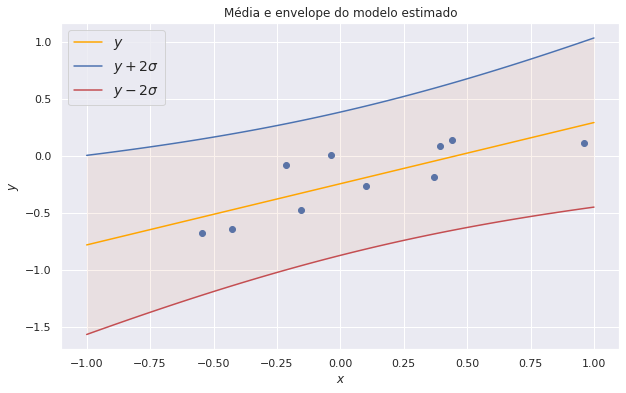

In [ ]:
def plot_envelope(modelo, X, y, Φ, titulo, intervalo=(-1, 1), ax=None):
    X_envelope = np.linspace(*intervalo, 100).reshape((-1, 1))
    y_envelope = Φ(X_envelope)@modelo.μ

    μ, Σ = modelo.predict(Φ(X_envelope))
    σ = np.sqrt(np.diagonal(Σ).reshape((-1, 1)))

    ax = plt.axes() if ax is None else ax

    ax.scatter(X, y)
    ax.fill_between(
        X_envelope.flatten(),
        (y_envelope + 2*σ).flatten(),
        (y_envelope - 2*σ).flatten(),
        alpha=.1
    )

    ax.plot(X_envelope, y_envelope, 'orange')
    ax.plot(X_envelope, y_envelope + 2*σ, 'b')
    ax.plot(X_envelope, y_envelope - 2*σ, 'r')
    
    ax.set_title(titulo)
    ax.legend(['$y$', '$y + 2\sigma$', '$y - 2\sigma$'])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')


plot_envelope(modelo_1, X, y, Φ=Φ, titulo='Média e envelope do modelo estimado')

### Gráficos da priori ~~da verosimilhança~~ e da posteriori

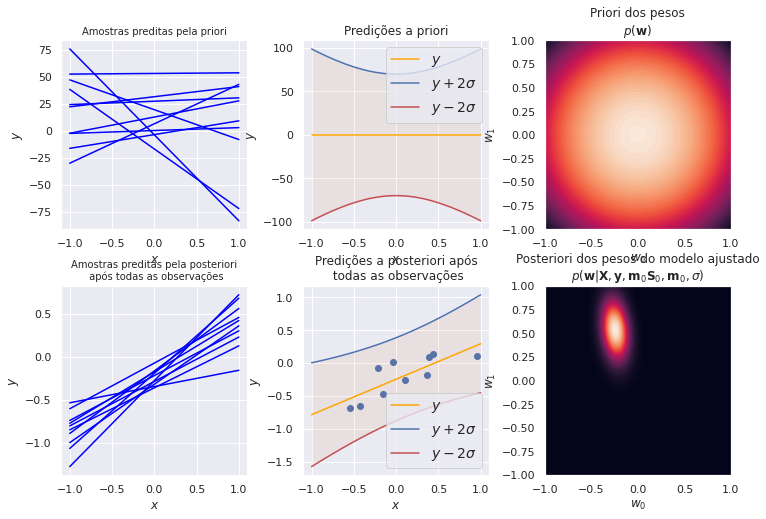

In [ ]:
#@markdown 
from scipy import stats


def plot_linhas(modelo, Φ, n_linhas=10, titulo='', intervalo=(-1, 1), ax=None):
    gaussiana = stats.multivariate_normal(mean=modelo.μ.flatten(), cov=modelo.Σ)

    X = np.linspace(*intervalo, 100).reshape((-1, 1))
    
    W = gaussiana.rvs(n_linhas)
    y = Φ(X)@W.T

    ax = plt.axes() if ax is None else ax
    ax.plot(X, y, color='blue')

    ax.set_title(titulo)
    ax.title.set_size(10)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

def plot_distribuicao(modelo, titulo, ax=None):
    gaussiana = stats.multivariate_normal(mean=modelo.μ.flatten(), cov=modelo.Σ)

    w = np.linspace(-1, 1, 100)
    W = np.dstack(np.meshgrid(w, w))

    ax = plt.axes() if ax is None else ax
    ax.contourf(w, w, gaussiana.pdf(W), 100)

    ax.set_title(titulo)
    ax.set_xlabel('$w_0$')
    ax.set_ylabel('$w_1$')

def plot_verossimilhanca(modelo, titulo, ax=None):
    # Slide 39: note que para plotar a verossimilhança eu faço variar o valor do vetor w.
    # Note ainda que talvez você ache mais fácil calcular a verossimilhança separada para cada par (x_, y_i)
    # e multiplicar tudo. Eu calculo a soma das log-verossimilhanças individuais e depois aplico uma exponencial.
    # Slide 39 - Nenhuma das duas equações. Essa verossimilhança é dos pessos (w). Eles tem distribuição normal 
    # com parametros estimados a partir dos dados
    
    #Fazer um meshgrid (w1 e w2) e calcular a função de verossimilhança para cada ponto
    # Não descobri qual é a função de verossimilhança :()
    pass


def plot_slide_39(X, y, gerar_modelo, Φ, intervalo=(-1, 1), show_priori_posteriori=True):
    total_graficos = 3 if show_priori_posteriori else 2

    fig, axes = plt.subplots(2, total_graficos, figsize=(16*total_graficos/4, 8)) # , sharex='col', sharey='col'
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    # Modelo sem estar treinado
    modelo = gerar_modelo()
    plot_linhas(modelo, Φ=Φ, titulo='Amostras preditas pela priori', ax=axes[0][0], intervalo=intervalo)
    plot_envelope(modelo, [[]], [[]], Φ=Φ, titulo='Predições a priori', ax=axes[0][1], intervalo=intervalo)
    # Sem verossimilhança na primeira linha - plot_verossimilhanca(modelo, titulo='', ax=axes[0][2])
    if show_priori_posteriori:
        plot_distribuicao(modelo, titulo='Priori dos pesos\n$p(\mathbf{w})$', ax=axes[0][2])

    # Modelo treinado com o resto do dataset
    modelo = gerar_modelo()
    modelo.fit(Φ(X), y)
    plot_linhas(modelo, Φ=Φ, titulo='Amostras preditas pela posteriori\n após todas as observações', ax=axes[1][0], intervalo=intervalo)
    plot_envelope(modelo, X, y, Φ=Φ, titulo='Predições a posteriori após\n todas as observações', ax=axes[1][1], intervalo=intervalo)
    #plot_verossimilhanca(modelo, titulo='Verossimilhança após todas as observações', ax=axes[1][2])
    if show_priori_posteriori:
        plot_distribuicao(modelo, titulo='Posteriori dos pesos do modelo ajustado\n$p(\mathbf{w}|\mathbf{X}, \mathbf{y}, \mathbf{m}_0 \mathbf{S}_0, \mathbf{m}_0, \sigma)$', ax=axes[1][2])

plot_slide_39(X, y, lambda: RLBParticular(D=D, σ_w=σ_w, σ=σ), Φ=Φ)

## Item 2. Implemente um modelo de regressão polinomial Bayesiana para os dados disponı́veis em `polynomial_regression_data.csv`

* Utilize um modelo polinomial de grau 5.
* Apresente um gráfico contendo os dados e uma representação da distribuição preditiva encontrada (escolha um método de aproximação).
* Esta representação consistirá na curva da média e nas curvas da média mais 2 desvios padrões e média menos 2 desvios padrões.


### Arquivo `polynomial_regression_data.csv`

**Obs**: Adicionei uma linha cabeçalho

In [ ]:
polynomial_regression_data = """x,y
6.964691855978616397e-01,-8.512708436871020412e-01
2.861393349503794648e-01,9.108640802938015035e-01
2.268514535642031094e-01,9.397306117796724312e-01
5.513147690828912317e-01,-3.237979358714317968e-01
7.194689697855630728e-01,-8.724512706668051676e-01
4.231064601244609591e-01,4.177759651763572335e-01
9.807641983846154821e-01,-1.530781416411577667e-01
6.848297385848632901e-01,-9.491341148698237973e-01
4.809319014843609352e-01,2.810486936010781478e-01
3.921175181941505272e-01,7.872412996284077202e-01
"""

dataset_2 = pd.read_csv(StringIO(polynomial_regression_data))
dataset_2

,x,y
0,0.696469,-0.851271
1,0.286139,0.910864
2,0.226851,0.939731
3,0.551315,-0.323798
4,0.719469,-0.872451
5,0.423106,0.417776
6,0.980764,-0.153078
7,0.684830,-0.949134
8,0.480932,0.281049
9,0.392118,0.787241


### Implementação do modelo

Foi utilizada a mesma implementação do item 1.

### Gráfico dos pontos de `polynomial_regression_data.csv`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


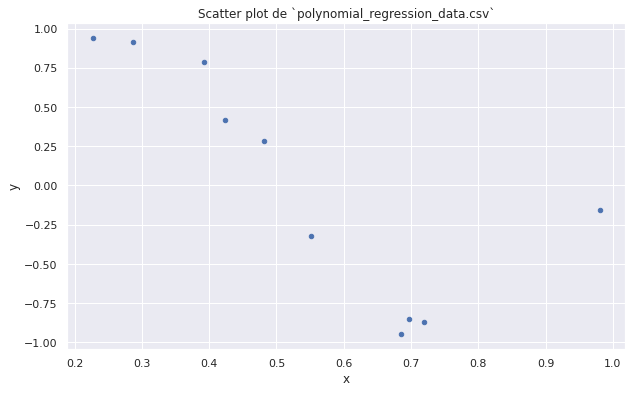

In [ ]:
dataset_2.plot.scatter(x='x', y='y', title="Scatter plot de `polynomial_regression_data.csv`")

### Função de transformação $\boldsymbol\Phi(\cdot)$

Definamos a função de transformação $\boldsymbol\Phi(\cdot)$ para deixar $\mathbf{X}$ na estrutura de polinômios:
\begin{align}
\boldsymbol\Phi(\mathbf{X}) &= [\phi(\boldsymbol{x}_1), \phi(\boldsymbol{x}_2), ..., \phi(\boldsymbol{x}_N)]^T, \\
\phi(\boldsymbol{x}) &= [x_1^0, x_1^1, x_1^2, \cdots, x_1^P], \\
& \phi: \mathcal{R}^{1}\rightarrow\mathcal{R}^{(P+1)}, \\
& \mathbf{X} \in \mathcal{R}^{N \times 1}.
\end{align}

In [ ]:
def Φ(X, P):
    """
    Φ(x, P) = [1, x^1, x^2, ..., x^P]
    """
    N, _ = X.shape
    X = np.ones((N, P+1)) * X

    for i in range(0, P+1):
        X[:, i] = X[:, i]**i
    
    return X

### Treinamento (estimação) do modelo

In [ ]:
#@title Hiperparâmetros do modelo
#@markdown Defina os hiperparâmetros do modelo que serão utilizados

#@markdown Valores padrão baseado no [vídeo do professor](https://drive.google.com/file/d/1UKqGTYebz8EkkkK2qbdYFnkR26Sbu9jU/view).

σ_w = 35 #@param {type: "number"}
σ = 0.3 #@param {type: "number"}
#@markdown ---
P = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown ---
treinamento = "em batch" #@param ["em batch", "sequencial"]

In [ ]:
X = dataset_2[['x']].to_numpy()
y = dataset_2[['y']].to_numpy()

N, D = Φ(X, P=P).shape
modelo_2 = RLBParticular(D=D, σ_w=σ_w, σ=σ)

if treinamento == 'em batch':
    modelo_2.fit(Φ(X, P=P), y)
else:
    modelo_2.fit_sequencial(Φ(X, P=P), y)

### Posteriori aprendida

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
p(\\boldsymbol{{w}}|\mathcal{{D}}) &= \mathcal{{N}}(\\boldsymbol{{w}}|\\boldsymbol{{\mu}}, \\boldsymbol{{\Sigma}}), \\\\
\\boldsymbol{{\mu}} &= {sp.latex(sp.Matrix(modelo_2.μ))}, \\\\
\\boldsymbol{{\Sigma}} &= {sp.latex(sp.Matrix(modelo_2.Σ))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

### Gráfico solicitado na questão

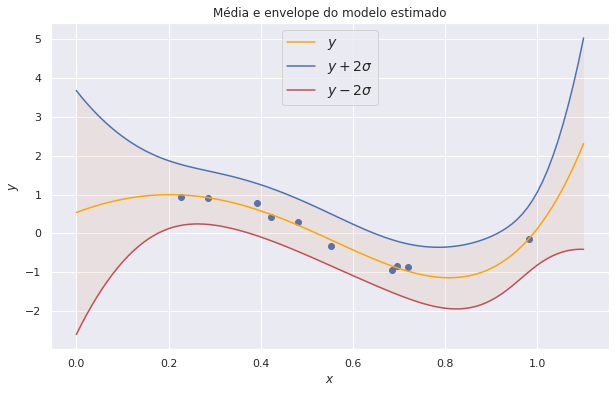

In [ ]:
plot_envelope(
    modelo_2, 
    X, y,
    Φ=lambda X: Φ(X, P=P),
    titulo='Média e envelope do modelo estimado',
    intervalo=(0, 1.1)
)

### Gráficos de amostras e de predições a priori

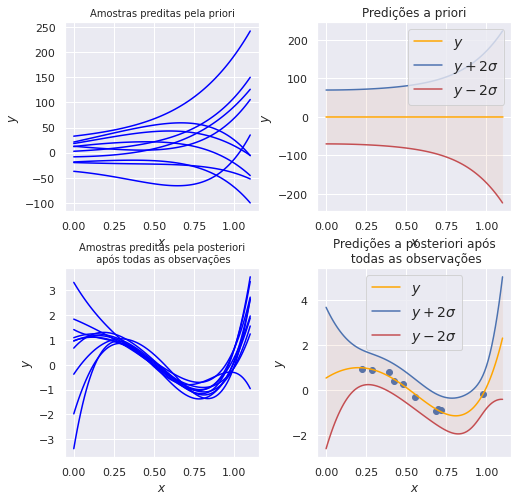

In [ ]:
plot_slide_39(X, y, lambda: RLBParticular(D=D, σ_w=σ_w, σ=σ), Φ=lambda X: Φ(X, P=P), intervalo=(0, 1.1), show_priori_posteriori=False)

### **Bônus 1:** Comparação de modelos polinomiais por Model Evidence

Desejamos escolher um modelo $\mathcal{M}_j$ dentre os $L$ possíveis.

Dado um modelo $\mathcal{M}_j$ e um conjunto de dados $\mathcal{D} = (\boldsymbol{X}, \boldsymbol{y})$, desejamos escolher o melhor modelo dado o conjunto de dados que temos (distribuição a posteriori do modelo):
\begin{aligned}
p(\mathcal{M}_j|\mathcal{D}) = \frac{p(\mathcal{M}_j)p(\mathcal{D}|\mathcal{M}_j)}{p(\mathcal{D})} \approx p(\mathcal{M}_j)p(\mathcal{D}|\mathcal{M}_j)
\end{aligned}

Considerando que $p(\mathcal{M}_i) = p(\mathcal{M}_j)$ para quaisquer modelos que compararemos (ou seja, a probabilidade a priori de qualquer modelo ser o mais adequado é igual), o termo relevante para a comparação entre os modelos é somente a **model evidence**/**evidência do modelo** (também conhecida como **verossimilhança marginal**) $p(\mathcal{D}|\mathcal{M}_j)$.

Temos que a evidência do modelo é obtida pela marginalização dos parâmetros:

\begin{aligned}
p(\mathcal{D}|\mathcal{M}_j) &= \int p(\mathcal{D}|\boldsymbol{w}, \mathcal{M}_j) p(\boldsymbol{w}|\mathcal{M}_j) d\boldsymbol{w} \\
p(\mathcal{D}) &= \int p(\mathcal{D}|\boldsymbol{w}) p(\boldsymbol{w}) d\boldsymbol{w}   ~~~~~~ \text{(omitindo $\mathcal{M}_j$)}
\end{aligned}

Ok, como há uma integral, vamos aproximar.

#### Evidência aproximada

Acho que estou calculando alguma coisa errada, kk

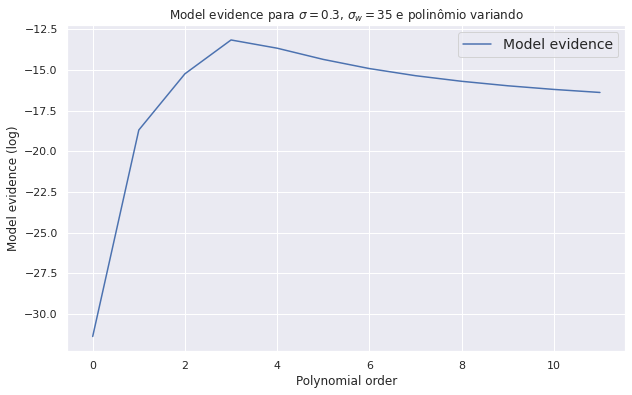

In [ ]:
def plot_model_evidence():
    valores = []
 
    for p in range(0, 12):
        Φ_X = Φ(X, P=p)
        N, D = Φ_X.shape
        
        modelo = RLBParticular(D=D, σ_w=σ_w, σ=σ)
        valores.append(modelo.log_evidence(X=Φ_X, y=y))
    
    return pd.DataFrame({'Model evidence': valores}).plot(xlabel='Polynomial order', ylabel='Model evidence (log)', title=f'Model evidence para $\sigma={σ}$, $\sigma_w={σ_w}$ e polinômio variando')
 
plot_model_evidence()

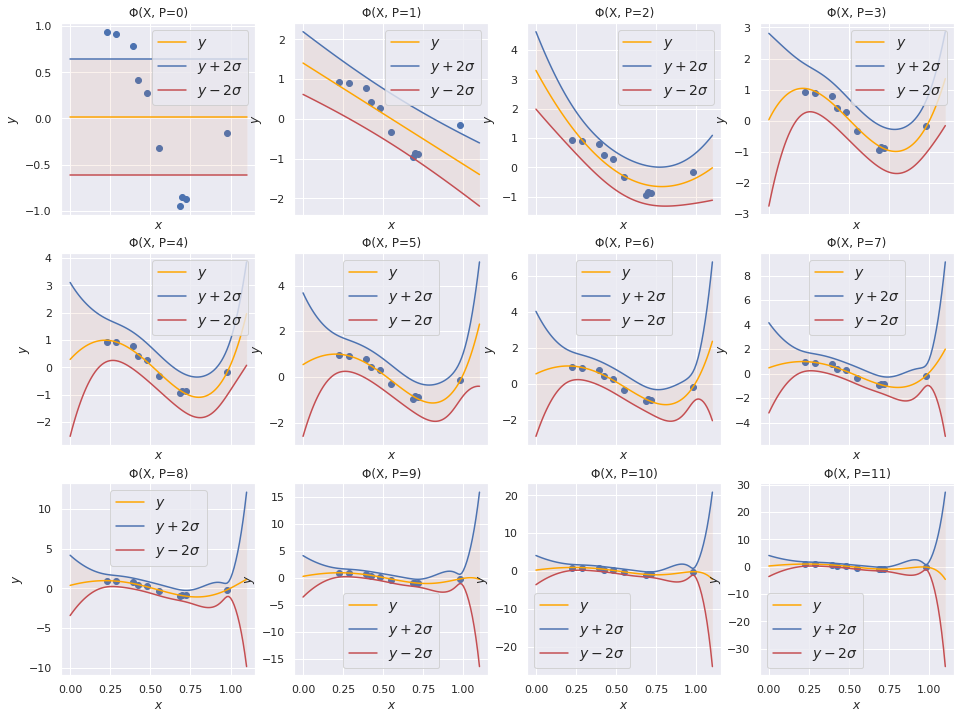

In [ ]:
def plot_modelos_polinomiais():
    fig, axes = plt.subplots(3, 4, figsize=(4*4, 4*3), sharex='col')#, sharey='col'

    for p, ax in zip(range(0, 12), axes.flatten()):
        N, D = Φ(X, P=p).shape
        modelo = RLBParticular(D=D, σ_w=σ_w, σ=σ)
        
        modelo.fit(Φ(X, P=p), y)

        plot_envelope(
            modelo, 
            X, y,
            Φ=lambda X: Φ(X, P=p),
            titulo=f'Φ(X, P={p})',
            intervalo=(0, 1.1),
            ax=ax
        )

plot_modelos_polinomiais()

### **Bônus 2:** Regressão RBF Bayesiana


#### Função de transformação $\boldsymbol\Phi(\cdot)$

Definamos a função de transformação $\boldsymbol\Phi(\cdot)$ para deixar $\mathbf{X}$ na estrutura de polinômios:
\begin{align}
\boldsymbol\Phi(\mathbf{X}, \boldsymbol{c}, \lambda) &= [\phi(\boldsymbol{x}_1, \boldsymbol{c}, \lambda), \phi(\boldsymbol{x}_2, \boldsymbol{c}, \lambda), ..., \phi(\boldsymbol{x}_N, \boldsymbol{c}, \lambda)]^T, \\
\phi(\boldsymbol{x}, \boldsymbol{c}, \lambda) &= [1, \phi(x_1, c_1, \lambda), \phi(x_1, c_2, \lambda), \cdots, \phi(x_1, c_M, \lambda)], \\
\phi(x_i, c_m, \lambda) &= \exp \left( \frac{-(x_i-c_m)^2}{2\lambda} \right) \\
& \boldsymbol{c} \in \mathcal{R}^{M \times 1}, \\
& \phi: \mathcal{R}^{1}\rightarrow\mathcal{R}^{(M+1)}, \\
& \mathbf{X} \in \mathcal{R}^{N \times 1}.
\end{align}

In [ ]:
def Φ(X, c, λ):
    """
    ϕ(x, c, λ) = [1, ϕ(x_1, c_1), ϕ(x_1, c_2), ..., ϕ(x_1, c_M)]
    ϕ(x_i, c_m, λ) = exp(-(x_i-c_m)^2 / (2*λ))
    """
    N, _ = X.shape
    M, _ = c.shape
    X = np.ones((N, M+1))

    for i in range(1, M+1):
        x_i = X[:, i]
        c_m = c[i-1, 0]
        ϕ = np.exp(-(x_i-c_m)**2/(2*λ))
        X[:, i] = ϕ
    
    return X

#### Treinamento (estimação) do modelo

In [ ]:
#@title Hiperparâmetros do modelo
#@markdown Defina os hiperparâmetros do modelo que serão utilizados

#@markdown Valores padrão baseado no [vídeo do professor](https://drive.google.com/file/d/1UKqGTYebz8EkkkK2qbdYFnkR26Sbu9jU/view).

σ_w = 35 #@param {type: "number"}
σ = 0.3 #@param {type: "number"}
#@markdown ---
M = 5 #@param {type:"slider", min:1, max:10, step:1}
c = np.linspace(0, 1, M).reshape((-1, 1))
λ = 1 #@param {type: "number"}

#@markdown ---
treinamento = "em batch" #@param ["em batch", "sequencial"]

In [ ]:
N, D = Φ(X, c=c, λ=λ).shape
modelo_3 = RLBParticular(D=D, σ_w=σ_w, σ=σ)

if treinamento == 'em batch':
    modelo_3.fit(Φ(X, c=c, λ=λ), y)
else:
    modelo_3.fit_sequencial(Φ(X, c=c, λ=λ), y)

#### Posteriori aprendida

In [ ]:
Math(sp.latex(f"""
\\begin{{aligned}}
p(\\boldsymbol{{w}}|\mathcal{{D}}) &= \mathcal{{N}}(\\boldsymbol{{w}}|\\boldsymbol{{\mu}}, \\boldsymbol{{\Sigma}}), \\\\
\\boldsymbol{{\mu}} &= {sp.latex(sp.Matrix(modelo_3.μ))}, \\\\
\\boldsymbol{{\Sigma}} &= {sp.latex(sp.Matrix(modelo_3.Σ))}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

#### Gráficos de amostras e de predições a priori

Ué?!

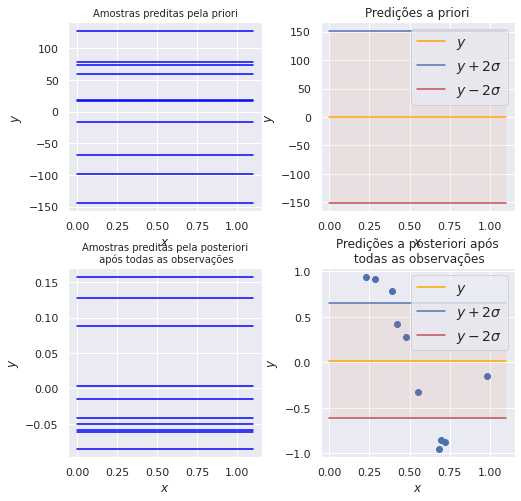

In [ ]:
plot_slide_39(X, y, lambda: RLBParticular(D=D, σ_w=σ_w, σ=σ), Φ=lambda X: Φ(X, c=c, λ=λ), intervalo=(0, 1.1), show_priori_posteriori=False)

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

def grid_search():
    parametros = {
        'σ_w': np.linspace(1, 50, 10),
        'σ': np.linspace(0.001, 1, 10),
        'M': np.linspace(1, 50, 10),
        'λ': np.linspace(0.001, 1, 10)
    }
    
    tuplas = ParameterGrid(parametros)

    valores = []

    for params in tqdm(ParameterGrid(parametros)):
        σ_w = params['σ_w']
        σ = params['σ']
        M = params['M']
        c = np.linspace(0, 1, int(M)).reshape((-1, 1))
        λ = params['λ']

        Φ_X = Φ(X, c=c, λ=λ)
        N, D = Φ_X.shape
        modelo = RLBParticular(D=D, σ_w=σ_w, σ=σ)

        try:
            valores.append((modelo.log_evidence(X=Φ_X, y=y), params))
        except:
            # Ignorar matriz singular
            pass
    
    return pd.DataFrame(valores, columns=['model_log_evidence', 'params']) \
        .sort_values(by='model_log_evidence', ascending=False)

valores = grid_search()

100%|██████████| 10000/10000 [00:10<00:00, 996.98it/s]


In [ ]:
valores.head()

,model_log_evidence,params
64,-12.321812,"{'M': 1.0, 'λ': 0.001, 'σ': 0.778, 'σ_w': 1.0}"
158,-12.321874,"{'M': 1.0, 'λ': 0.112, 'σ': 0.778, 'σ_w': 1.0}"
252,-12.327102,"{'M': 1.0, 'λ': 0.223, 'σ': 0.778, 'σ_w': 1.0}"
346,-12.344878,"{'M': 1.0, 'λ': 0.334, 'σ': 0.778, 'σ_w': 1.0}"
440,-12.369299,"{'M': 1.0, 'λ': 0.445, 'σ': 0.778, 'σ_w': 1.0}"


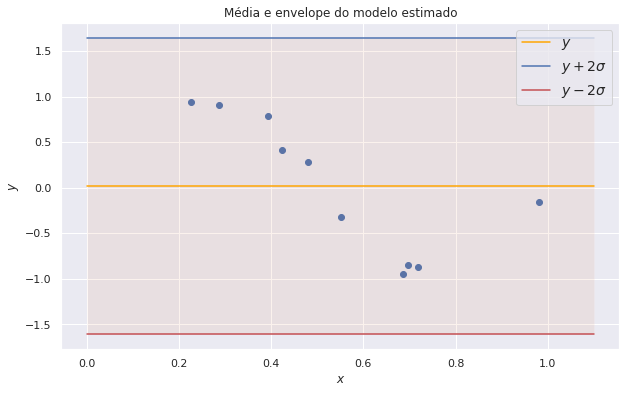

In [ ]:
for i, (model_evidence, params) in valores[:1].iterrows():
    σ_w = params['σ_w']
    σ = params['σ']
    M = params['M']
    c = np.linspace(0, 1, int(M)).reshape((-1, 1))
    λ = params['λ']

    N, D = Φ(X, c=c, λ=λ).shape
    
    modelo = RLBParticular(D=D, σ_w=σ_w, σ=σ)
    modelo.fit(Φ(X, c=c, λ=λ), y)

    plot_envelope(
        modelo, 
        X, y,
        Φ=lambda X: Φ(X, c=c, λ=λ),
        titulo='Média e envelope do modelo estimado',
        intervalo=(0, 1.1)
    )
    # plot_slide_39(X, y, lambda: RLBParticular(D=D, σ_w=σ_w, σ=σ), Φ=lambda X: Φ(X, c=c, λ=λ), intervalo=(0, 1.1), show_priori_posteriori=False)

TODO - Inicializar os centroides